<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [655]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [656]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [657]:
epm.head()

,ID,revolutions,humidity,vibration
0,1,93.744,73.999,18.0
1,2,93.740,73.999,18.0
2,3,93.736,73.998,18.0
3,4,93.732,73.998,18.0
4,5,93.729,73.998,18.0


- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [658]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.4 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [659]:
epm_clean = epm.isnull().sum()
epm_clean

ID                0
revolutions       0
humidity          0
vibration      2438
dtype: int64

In [660]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
dtype: int64

<hr>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [661]:
epm_clean.describe()

,ID,revolutions,humidity,vibration
count,109563.000000,109563.000000,109563.000000,109563.000000
mean,56054.280962,46.250013,74.216124,28.340276
std,32493.380259,19.130226,0.686551,24.292500
min,1.000000,16.933000,72.399000,2.000000
25%,28023.500000,28.818000,73.908000,8.000000
50%,56114.000000,43.295000,74.207000,21.280000
75%,84373.500000,64.000000,74.717000,39.210000
max,112001.000000,93.744000,75.400000,100.000000


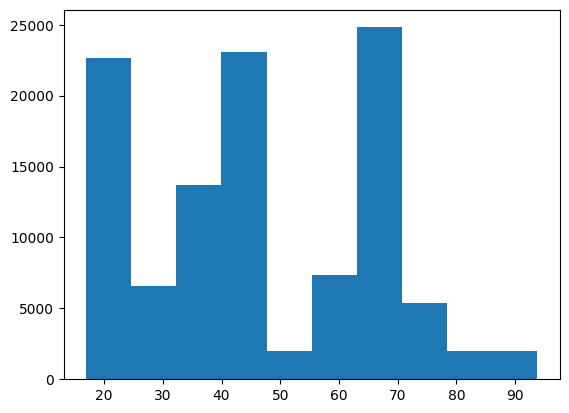

In [662]:
revolutions = epm_clean['revolutions']
plt.hist(revolutions)
plt.show()

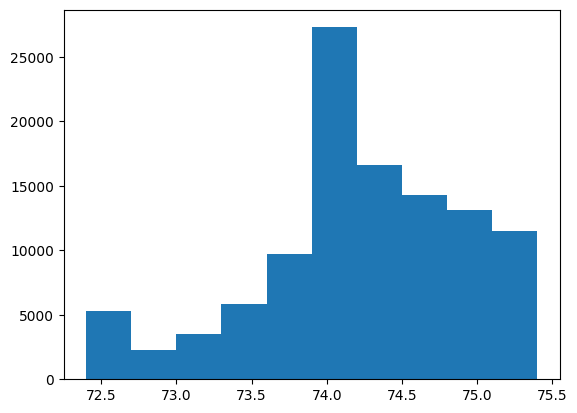

In [663]:
humidity = epm_clean['humidity']
plt.hist(humidity)
plt.show()

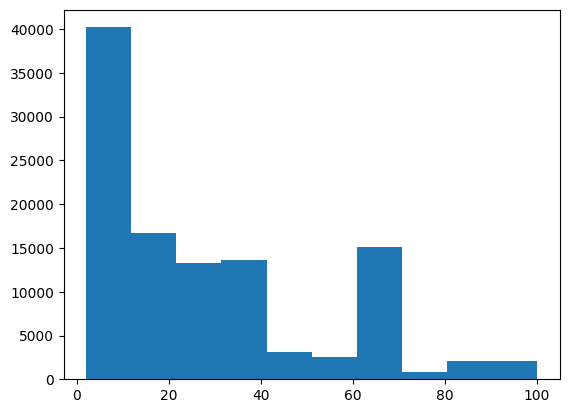

In [664]:
vibration = epm_clean['vibration']
plt.hist(vibration)
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


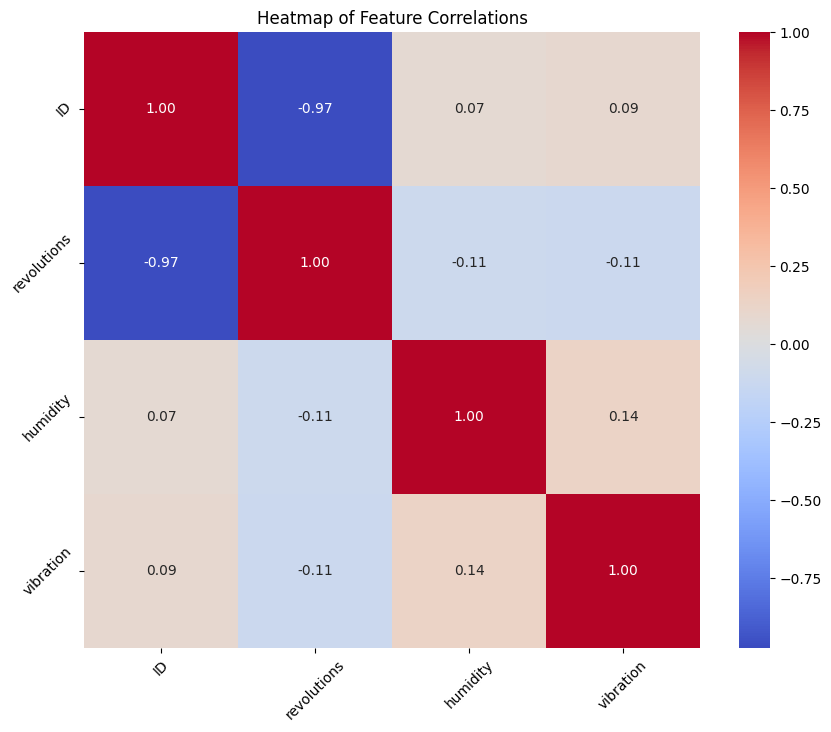

In [665]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

In [666]:
import pandas as pd

# Read the training data
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Print the shape and first few rows
print('Shape of Train dataset: ', train_df.shape)
print(train_df.head())


Shape of Train dataset:  (112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   2       93.740    73.999       18.0
2   3       93.736    73.998       18.0
3   4       93.732    73.998       18.0
4   5       93.729    73.998       18.0


In [667]:
print(train_df.columns)  # Print column indices

Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [668]:
print(train_df.head())

   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   2       93.740    73.999       18.0
2   3       93.736    73.998       18.0
3   4       93.732    73.998       18.0
4   5       93.729    73.998       18.0


In [669]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Step 2: Print the first few rows to verify the data structure
print(train_df.head())

# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of Train dataset: ', train_df.shape)

# Step 4: Check the actual number of columns
num_columns = train_df.shape[1]
print(f"Number of columns: {num_columns}")

# Step 5: Define column names (ensure the count matches the number of columns)
col_names = ['id', 'revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']

# Ensure the number of column names matches the number of columns in the DataFrame
if len(col_names) == num_columns:
    # Assign column names
    train_df.columns = col_names
else:
    print("Error: The number of column names does not match the number of columns in the DataFrame")
    print(f"Expected {num_columns} column names but got {len(col_names)}.")

# Print the columns to verify
print("Columns of the DataFrame:", train_df.columns)

# Print the shape and head of the Data


   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   2       93.740    73.999       18.0
2   3       93.736    73.998       18.0
3   4       93.732    73.998       18.0
4   5       93.729    73.998       18.0
Initial shape of Train dataset:  (112001, 4)
Number of columns: 4
Error: The number of column names does not match the number of columns in the DataFrame
Expected 4 column names but got 9.
Columns of the DataFrame: Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [670]:
# Read the test data
test_df = pd.read_csv("predictive-maintenance-dataset.csv")

# Inspect the test DataFrame
print(test_df.shape) 
print(test_df.head()) 
print(test_df.columns)  


(112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   2       93.740    73.999       18.0
2   3       93.736    73.998       18.0
3   4       93.732    73.998       18.0
4   5       93.729    73.998       18.0
Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [671]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
truth_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Step 2: Print the first few rows to verify the data structure
print("Initial ground truth data:")
print(truth_df.head())

# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of ground truth dataset: ', truth_df.shape)

# Step 4: Drop the second column (which is 1-indexed, hence index 1)
if truth_df.shape[1] > 1:
    truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
    print("Column 1 dropped successfully.")
else:
    print("Not enough columns to drop the specified column.")

# Step 5: Print the shape and head of the DataFrame to verify
print('Final shape of ground truth dataset: ', truth_df.shape)
print(truth_df.head())


Initial ground truth data:
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   2       93.740    73.999       18.0
2   3       93.736    73.998       18.0
3   4       93.732    73.998       18.0
4   5       93.729    73.998       18.0
Initial shape of ground truth dataset:  (112001, 4)
Column 1 dropped successfully.
Final shape of ground truth dataset:  (112001, 3)
   ID  humidity  vibration
0   1    73.999       18.0
1   2    73.999       18.0
2   3    73.998       18.0
3   4    73.998       18.0
4   5    73.998       18.0


In [672]:
train_df.sort_values

<bound method DataFrame.sort_values of             ID  revolutions  humidity  vibration
0            1       93.744    73.999      18.00
1            2       93.740    73.999      18.00
2            3       93.736    73.998      18.00
3            4       93.732    73.998      18.00
4            5       93.729    73.998      18.00
...        ...          ...       ...        ...
111996  111997       20.186    73.992       2.00
111997  111998       20.186    73.992      20.01
111998  111999       20.185    73.992      20.01
111999  112000       20.185    73.992      20.00
112000  112001       20.184    73.992       2.00

[112001 rows x 4 columns]>

In [673]:
# sort based on id and cycle
train_df = train_df.sort_values(['ID','revolutions'])
train_df.head()

,ID,revolutions,humidity,vibration
0,1,93.744,73.999,18.0
1,2,93.740,73.999,18.0
2,3,93.736,73.998,18.0
3,4,93.732,73.998,18.0
4,5,93.729,73.998,18.0


<span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing </span>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.10 Function to reshape dataset as required by LSTM</span>

In [674]:
def gen_sequence(epm_clean, seq_length, seq_cols):

    # Ensure only feature columns are used
    data_array = epm_clean[seq_cols].values
    num_elements = data_array.shape[0]

    for start, stop in zip(range(0, num_elements - seq_length + 1), range(seq_length, num_elements + 1)):
          yield data_array[start:stop, :]


In [675]:
# Define sequence length and columns to use
sequence_length = 3
feature_columns = ['revolutions', 'humidity', 'vibration', 'x1', 'x2', 'x3', 'x4', 'x5']


In [676]:
# Generator for the sequences
seq_gen = (list(gen_sequence(epm_clean[epm_clean['vibration'] == id], sequence_length, feature_columns))
           for id in epm_clean['vibration'].unique())

In [677]:
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [678]:
label_gen = [gen_labels(epm_clean[epm_clean['vibration']==id], sequence_length, ['humidity'])
             for id in epm_clean['vibration'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
print(label_array.shape)

(86609, 1)


In [679]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Example dummy data for seq_array and label_array
# Replace these with your actual data
import numpy as np

seq_array = np.random.rand(100, 10, 5)  # 100 samples, 10 timesteps, 5 features
label_array = np.random.randint(2, size=(100, 1))  # 100 samples, 1 output label

model = Sequential()  # Define the model

# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

# First LSTM layer
model.add(LSTM(
    units=256,
    input_shape=(seq_array.shape[1], nb_features),  # Set input shape for the first layer
    return_sequences=True  # Set to True because we have a second LSTM layer
))
# Plus a 30% dropout rate
model.add(Dropout(0.2))

# Second LSTM layer
model.add(LSTM(
    units=128,  # Adjust the number of units as needed
    return_sequences=True
))
model.add(Dropout(0.2))

# Third LSTM layer
model.add(LSTM(
    units=64,
    return_sequences=False
))
model.add(Dropout(0.2))

# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will optimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture
print(model.summary())

/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_30 (LSTM)                  │ (None, 10, 256)        │       268,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 10, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ (None, 10, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_32 (LSTM)                  │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 514,881 (1.96 MB)

 Trainable params: 514,881 (1.96 MB)

 Non-trainable params: 0 (0.00 B)

None


In [680]:
from tensorflow.keras.callbacks import EarlyStopping
#EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,         
    patience=20,    
    verbose=0,   
    mode='auto'    
)

<hr>

In [681]:
# Train the model
history=model.fit(
    seq_array, 
    label_array,
    epochs=20,        
    batch_size=128,
    validation_split=0.2,  
    verbose=1,          # Verbosity mode
    callbacks=[early_stopping]  # Add early stopping callback
)

Epoch 1/20


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.4875 - loss: 0.6940 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5000 - loss: 0.6947 - val_accuracy: 0.5000 - val_loss: 0.6937
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5250 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6944
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5375 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss: 0.6955
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4875 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6964
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.4625 - loss: 0.6967 - val_accuracy: 0.4500 - val_loss: 0.6970
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.5125 - loss: 0.6926 - val_accuracy: 0.2500 - val_loss: 0.6979
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.6375 - loss: 0.6868 - val_accuracy: 0.4500 - val_loss: 0.6990
Epoch 9/20


<span style="color:#0F3460;font-size:19px; font-weight: bold;">Results</span>

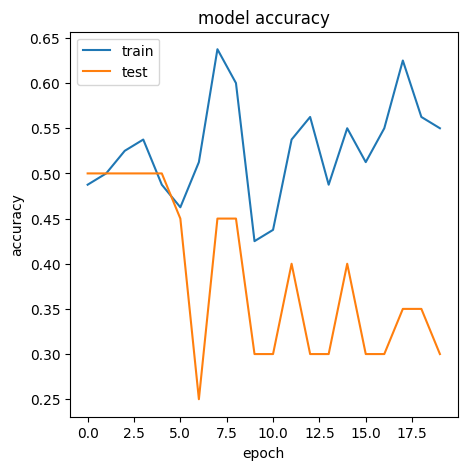

In [682]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

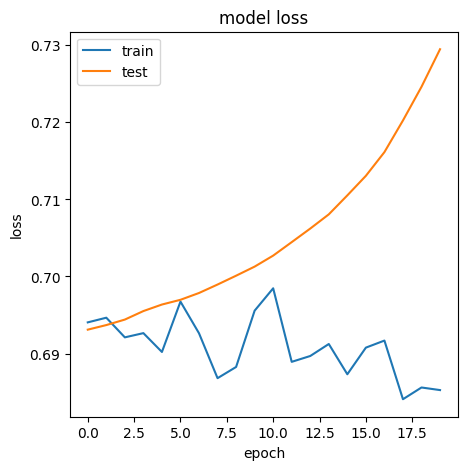

In [683]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [684]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

def print_results(y_test, y_pred):
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    # ROC AUC Score
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print("Area under curve: ", model_roc_auc, "\n")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    best_threshold = np.round(thresholds[ix], 3)
    
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC: %.3f' % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold: ' + str(best_threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

In [685]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=128)
print('Accurracy of model on training data: {}'.format(scores[1]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4900 - loss: 0.6921
Accurracy of model on training data: 0.49000000953674316


In [686]:
# make predictions and compute confusion matrix
y_pred_prob = model.predict(seq_array, verbose=1, batch_size=128)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Flatten the predictions to match the shape of y_test
y_pred = y_pred.flatten()

# Assuming y_true is the true labels
y_true = label_array.flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


In [687]:
# Compute and print precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  0.49122807017543857
Recall:  0.56


F1 Score:  0.5233644859813084
Area under curve:  0.4900000000000001 



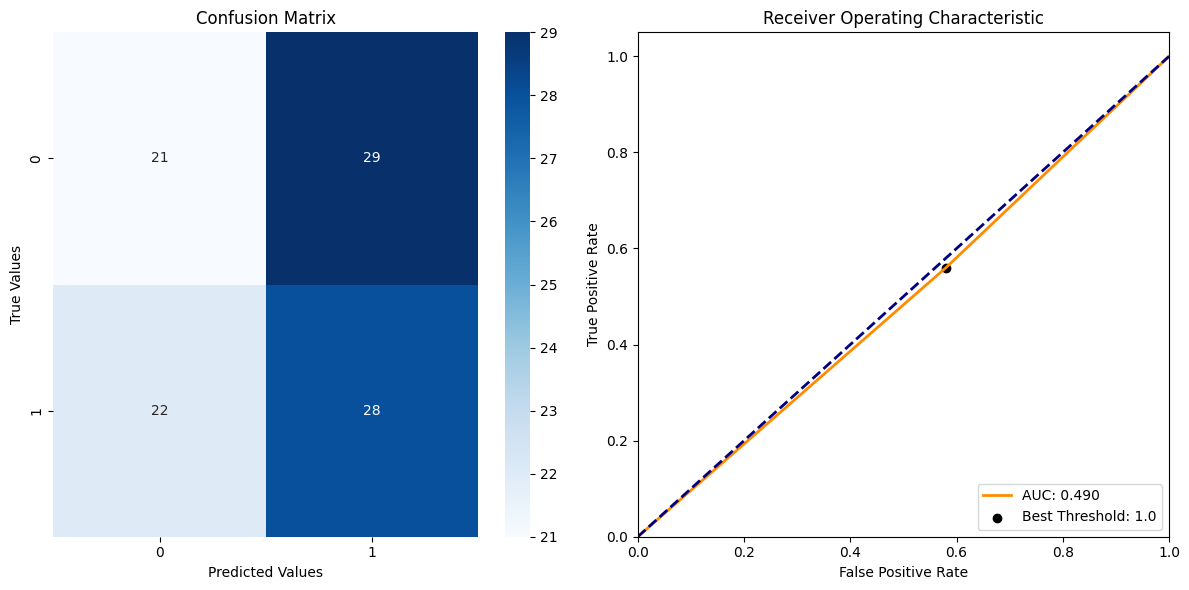

In [688]:
# Print results
print_results(y_true, y_pred)

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction</span>

In [689]:
import pandas as pd

# Define thresholds for maintenance (example values, adjust based on your epm_clean)
revolutions_threshold = 1000
humidity_threshold = 75
vibration_threshold = 50

# Create the 'maintenance_needed' column based on the criteria
epm_clean['maintenance_needed'] = ((epm_clean['revolutions'] > revolutions_threshold) |
                              (epm_clean['humidity'] > humidity_threshold) |
                              (epm_clean['vibration'] > vibration_threshold)).astype(int)

# Check the new column
print(epm_clean[['revolutions', 'humidity', 'vibration', 'maintenance_needed']].head())

   revolutions  humidity  vibration  maintenance_needed
0       93.744    73.999       18.0                   0
1       93.740    73.999       18.0                   0
2       93.736    73.998       18.0                   0
3       93.732    73.998       18.0                   0
4       93.729    73.998       18.0                   0


/tmp/ipykernel_3225/3476167417.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean['maintenance_needed'] = ((epm_clean['revolutions'] > revolutions_threshold) |


In [690]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target variable
X = epm_clean[['revolutions', 'humidity', 'vibration']]
y = epm_clean['maintenance_needed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [691]:
epm_clean['revolutions_smooth'] = epm_clean['revolutions'].rolling(window=2).mean()
epm_clean['humidity_smooth'] = epm_clean['humidity'].rolling(window=2).mean()
epm_clean['vibration_smooth'] = epm_clean['vibration'].rolling(window=2).mean()

print(epm_clean)

            ID  revolutions  humidity  vibration  maintenance_needed  \
0            1       93.744    73.999      18.00                   0   
1            2       93.740    73.999      18.00                   0   
2            3       93.736    73.998      18.00                   0   
3            4       93.732    73.998      18.00                   0   
4            5       93.729    73.998      18.00                   0   
...        ...          ...       ...        ...                 ...   
111996  111997       20.186    73.992       2.00                   0   
111997  111998       20.186    73.992      20.01                   0   
111998  111999       20.185    73.992      20.01                   0   
111999  112000       20.185    73.992      20.00                   0   
112000  112001       20.184    73.992       2.00                   0   

        revolutions_smooth  humidity_smooth  vibration_smooth  
0                      NaN              NaN               NaN  
1      

/tmp/ipykernel_3225/3876983819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean['revolutions_smooth'] = epm_clean['revolutions'].rolling(window=2).mean()
/tmp/ipykernel_3225/3876983819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean['humidity_smooth'] = epm_clean['humidity'].rolling(window=2).mean()
/tmp/ipykernel_3225/3876983819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [705]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Example synthetic data for demonstration
np.random.seed(42)

# Load your dataset
# Generate synthetic maintenance dates (e.g., maintenance every 30 days)
start_date = datetime(2024, 7, 23)  # Example start date
epm_clean['maintenance_date'] = [start_date + timedelta(days=np.random.randint(1, 365)) for _ in range(len(epm_clean))]

# Convert maintenance_date to datetime format
epm_clean['maintenance_date'] = pd.to_datetime(epm_clean['maintenance_date'])

# Calculate days until maintenance based on a reference date
reference_date = epm_clean['maintenance_date'].min()
epm_clean['days_until_maintenance'] = (epm_clean['maintenance_date'] - reference_date).dt.days

# Drop the maintenance_date column if no longer needed
epm_clean.drop(columns=['maintenance_date'], inplace=True)

# Prepare your features and target variable
X = epm_clean[['revolutions', 'humidity', 'vibration']]
y = epm_clean['days_until_maintenance']

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Convert predicted days back to dates
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]
print(predicted_dates[:5])  # Print first 5 predicted dates



/tmp/ipykernel_3225/3450261886.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean['maintenance_date'] = [start_date + timedelta(days=np.random.randint(1, 365)) for _ in range(len(epm_clean))]
/tmp/ipykernel_3225/3450261886.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  epm_clean['maintenance_date'] = pd.to_datetime(epm_clean['maintenance_date'])
/tmp/ipykernel_3225/3450261886.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

Mean Squared Error: 15131.16527122511
[Timestamp('2025-01-02 00:00:00'), Timestamp('2024-10-31 00:00:00'), Timestamp('2025-02-04 00:00:00'), Timestamp('2024-11-19 00:00:00'), Timestamp('2025-03-20 00:00:00')]


In [693]:
# If you have actual maintenance dates for comparison
# actual_dates = [reference_date + timedelta(days=int(day)) for day in y_test]

# Display a sample of actual vs. predicted dates
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]

# Create a DataFrame to compare actual and predicted dates
results_df = pd.DataFrame({
    'Actual Days Until Maintenance': y_test.values,
    'Predicted Days Until Maintenance': y_pred,
    'Predicted Maintenance Date': predicted_dates
})

# Display the first few rows of the results
print(results_df.head())

   Actual Days Until Maintenance  Predicted Days Until Maintenance  \
0                            218                        162.782167   
1                            343                         99.070000   
2                            297                        195.389345   
3                             85                        118.930000   
4                            338                        239.570000   

  Predicted Maintenance Date  
0                 2025-01-02  
1                 2024-10-31  
2                 2025-02-04  
3                 2024-11-19  
4                 2025-03-20  


In [704]:

# Add the predicted maintenance dates to the original DataFrame
predicted_dates = [reference_date + timedelta(days=int(day)) for day in y_pred]

# Add predictions to the DataFrame
results_df = pd.DataFrame({
    'ID': epm_clean.loc[X_test.index, 'ID'],
    'Revolutions': X_test['revolutions'].values,
    'Humidity': X_test['humidity'].values,
    'Vibration': X_test['vibration'].values,
    'Predicted Days Until Maintenance': y_pred,
    'Predicted Maintenance Date': predicted_dates
})

# Display the first few rows of the results
print(results_df.head())

          ID  Revolutions  Humidity  Vibration  \
99312  99313       21.626    73.734       3.17   
95655  95656       21.834    73.943      39.14   
13235  13236       63.884    73.609      23.22   
6059    6060       76.321    72.546      21.49   
35291  35292       64.736    74.534       8.00   

       Predicted Days Until Maintenance Predicted Maintenance Date  
99312                        162.782167                 2025-01-02  
95655                         99.070000                 2024-10-31  
13235                        195.389345                 2025-02-04  
6059                         118.930000                 2024-11-19  
35291                        239.570000                 2025-03-20  
